In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("D:/Data Science/data swts/train (1).csv")

In [4]:
train.shape

(54808, 14)

In [5]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [7]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [8]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

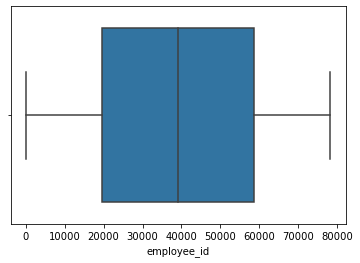

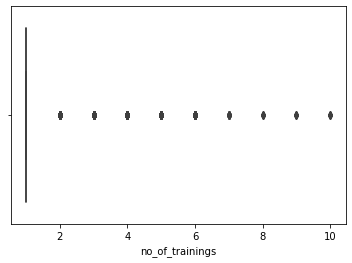

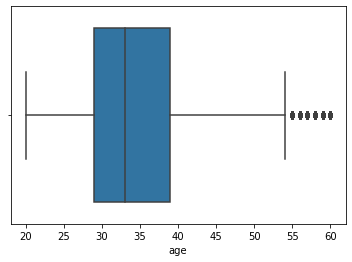

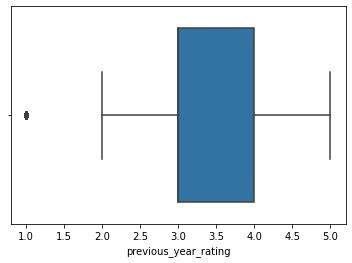

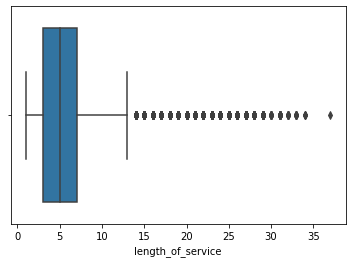

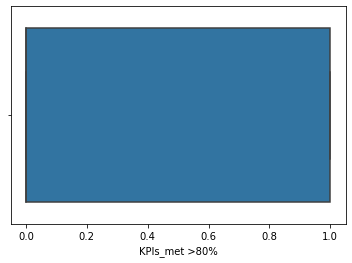

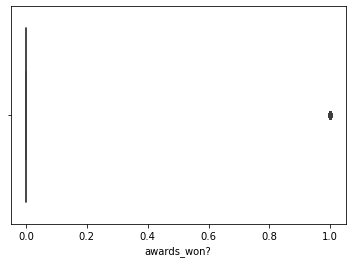

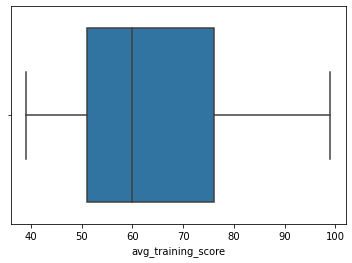

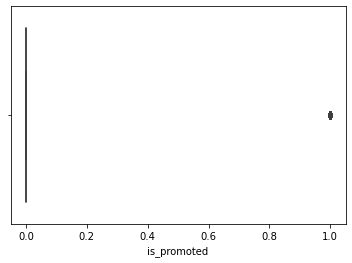

In [9]:
for i in train.describe().columns:
    sns.boxplot(train[i])
    plt.show()

In [10]:
train['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [11]:
train['education']=train['education'].fillna(train['education'].mode()[0])

In [12]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
train['previous_year_rating']=train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0])

<AxesSubplot:xlabel='is_promoted', ylabel='count'>

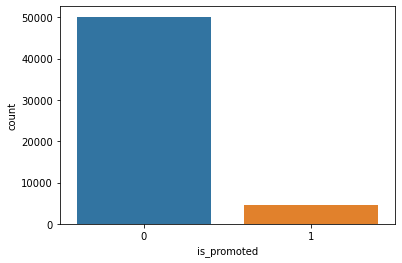

In [14]:
sns.countplot(train['is_promoted'])

<AxesSubplot:xlabel='age', ylabel='Density'>

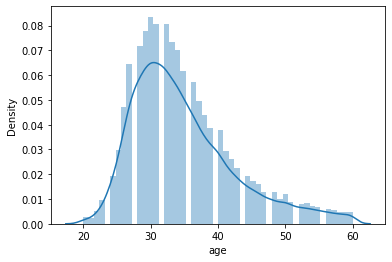

In [15]:
sns.distplot(train['age'])

In [16]:
# train['length_of_service']=np.log(train['length_of_service'])

In [17]:
num_col=train.select_dtypes(include=np.number).columns

In [18]:
cat_col=train.select_dtypes(exclude=np.number).columns

In [19]:
print(num_col)
print(cat_col)

Index(['employee_id', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')
Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')


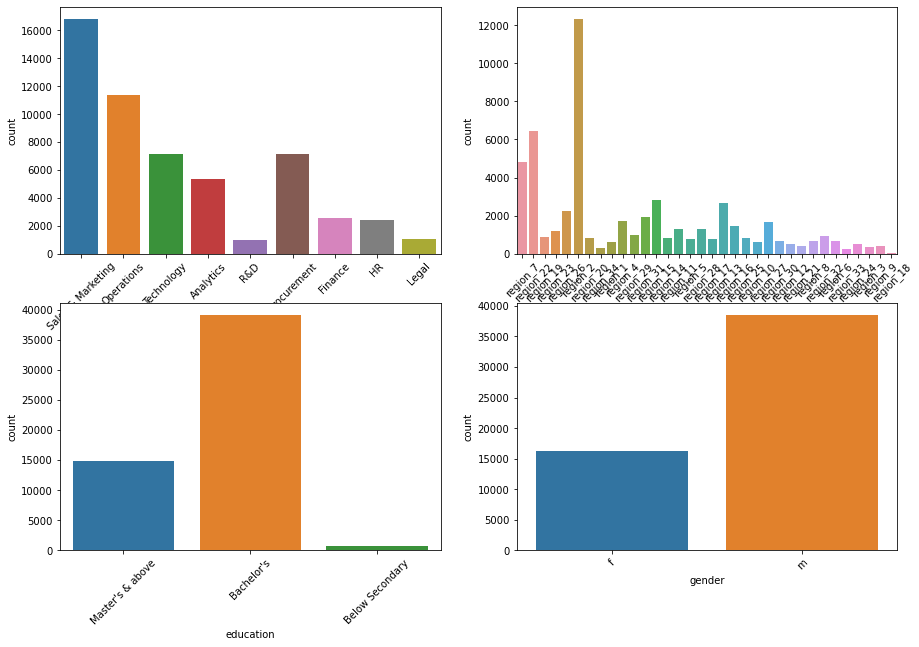

In [20]:
plt.figure(figsize=(15,10))
columns=['department','region','education','gender']
plots=[i for i in range(1,5)]
for plot, colum in zip(plots,columns):
    plt.subplot(2,2,plot)
    sns.countplot(train[colum])
    plt.xticks(rotation=45)

In [21]:
pd.crosstab(train['is_promoted'],train['gender'])

gender,f,m
is_promoted,,
0,14845,35295
1,1467,3201


In [22]:
pd.crosstab(train['is_promoted'],train['department'])

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,4840,2330,2282,986,10325,6450,930,15627,6370
1,512,206,136,53,1023,688,69,1213,768


In [23]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [24]:
columns=['age','avg_training_score']

train.groupby(['is_promoted'])[columns].agg([np.mean,np.max,np.min,np.std])

age                     avg_training_score            \
                  mean amax amin       std               mean amax amin   
is_promoted                                                               
0            34.844037   60   20  7.710679          62.647686   96   39   
1            34.372965   60   20  7.081449          71.325193   99   41   

                        
                   std  
is_promoted             
0            12.991969  
1            14.746122

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [26]:
cat_col

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [27]:
for i in cat_col:
    train[i]=le.fit_transform(train[i])

In [28]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,31,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,14,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,10,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,15,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,18,0,1,0,1,45,3.0,2,0,0,73,0


In [29]:
X=train.drop(['is_promoted','employee_id'],axis=1)

In [30]:
Y=train['is_promoted']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3, random_state=40)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


clf=RandomForestClassifier(n_estimators=50,max_depth=5)
clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)

print("Confusion Matrix : ,\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix : ,
 [[15080    11]
 [ 1186   166]]


In [33]:
accuracy_score(Y_test,Y_pred)

0.9272030651340997

In [34]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     15091
           1       0.94      0.12      0.22      1352

    accuracy                           0.93     16443
   macro avg       0.93      0.56      0.59     16443
weighted avg       0.93      0.93      0.90     16443



In [35]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_ros,Y_ros=ros.fit_resample(X,Y)
Y_ros.value_counts()

0    50140
1    50140
Name: is_promoted, dtype: int64

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X_ros,Y_ros, test_size=0.3, random_state=40)

In [37]:

clf=RandomForestClassifier(n_estimators=50,max_depth=5)
clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)

print("Confusion Matrix : ,\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix : ,
 [[10013  4980]
 [ 1936 13155]]


In [38]:
accuracy_score(Y_test,Y_pred)

0.7701103576652041

In [39]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.67      0.74     14993
           1       0.73      0.87      0.79     15091

    accuracy                           0.77     30084
   macro avg       0.78      0.77      0.77     30084
weighted avg       0.78      0.77      0.77     30084



In [40]:
!pip install -U imbalanced-learn
!pip install imblearn
!pip install -c glemaitre imbalanced-learn
!pip install imblearn==0

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.




  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'glemaitre'


In [45]:
# apply smote

In [41]:
from imblearn.over_sampling import SMOTE

smote_X=X_train.copy()
smote_Y=Y_train.copy()

In [42]:
import os

In [44]:
os =SMOTE(random_state=0,k_neighbors=2)
os_smot_X,os_smot_Y=os.fit_resample(smote_X,smote_Y)
os_smot_Y.value_counts()

0    35147
1    35147
Name: is_promoted, dtype: int64

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(os_smot_X,os_smot_Y, test_size=0.3, random_state=40)

In [46]:
clf=RandomForestClassifier(n_estimators=50,max_depth=5)
clf.fit(X_train,Y_train)

Y_pred = clf.predict(X_test)

print("Confusion Matrix : ,\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix : ,
 [[6953 3613]
 [1376 9147]]


In [47]:
accuracy_score(Y_test,Y_pred)

0.7634311726492484

In [48]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.66      0.74     10566
           1       0.72      0.87      0.79     10523

    accuracy                           0.76     21089
   macro avg       0.78      0.76      0.76     21089
weighted avg       0.78      0.76      0.76     21089

